## Predicting Car Prices

Testing out KNeighborsRegressor, and checking which feature most accurately determines car price.

In [1]:
import pandas as pd
import numpy as np

pd.options.display.max_columns = 99

In [2]:
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

cars = pd.read_csv('imports-85.data', names = cols)

In [3]:
cars

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.00,160,5500,16,22,?


In [4]:
continuous_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight','engine-size', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
numeric_cars = cars[continuous_values_cols]

In [5]:
numeric_cars

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.00,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.00,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.00,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.00,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.00,115,5500,18,22,17450
5,?,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,8.50,110,5500,19,25,15250
6,158,105.8,192.7,71.4,55.7,2844,136,3.19,3.40,8.50,110,5500,19,25,17710
7,?,105.8,192.7,71.4,55.7,2954,136,3.19,3.40,8.50,110,5500,19,25,18920
8,158,105.8,192.7,71.4,55.9,3086,131,3.13,3.40,8.30,140,5500,17,20,23875
9,?,99.5,178.2,67.9,52.0,3053,131,3.13,3.40,7.00,160,5500,16,22,?


In [6]:
numeric_cars = numeric_cars.replace('?', np.nan)
numeric_cars

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.00,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.00,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.00,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.00,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.00,115,5500,18,22,17450
5,NaN,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,8.50,110,5500,19,25,15250
6,158,105.8,192.7,71.4,55.7,2844,136,3.19,3.40,8.50,110,5500,19,25,17710
7,NaN,105.8,192.7,71.4,55.7,2954,136,3.19,3.40,8.50,110,5500,19,25,18920
8,158,105.8,192.7,71.4,55.9,3086,131,3.13,3.40,8.30,140,5500,17,20,23875
9,NaN,99.5,178.2,67.9,52.0,3053,131,3.13,3.40,7.00,160,5500,16,22,NaN


In [7]:
numeric_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

Drop rows without price data, since it is the row we want to predict.

In [8]:
numeric_cars = numeric_cars.dropna(subset=['price'])
numeric_cars.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

Replace all other missing values with column means

In [9]:
numeric_cars = numeric_cars.astype('float')
numeric_cars = numeric_cars.fillna(numeric_cars.mean())

In [10]:
numeric_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [11]:
normalised_listing = (numeric_cars - numeric_cars.min())/(numeric_cars.max() - numeric_cars.min())
normalised_listing['price'] = numeric_cars['price']
normalised_listing

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.125000,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.125000,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.125000,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.187500,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.062500,0.313084,0.551020,0.138889,0.157895,17450.0
5,0.298429,0.384840,0.540299,0.512821,0.441667,0.395268,0.283019,0.464286,0.633333,0.093750,0.289720,0.551020,0.166667,0.236842,15250.0
6,0.486911,0.559767,0.770149,0.948718,0.658333,0.525989,0.283019,0.464286,0.633333,0.093750,0.289720,0.551020,0.166667,0.236842,17710.0
7,0.298429,0.559767,0.770149,0.948718,0.658333,0.568658,0.283019,0.464286,0.633333,0.093750,0.289720,0.551020,0.166667,0.236842,18920.0
8,0.486911,0.559767,0.770149,0.948718,0.675000,0.619860,0.264151,0.421429,0.633333,0.081250,0.429907,0.551020,0.111111,0.105263,23875.0
10,0.664921,0.425656,0.532836,0.384615,0.541667,0.351823,0.177358,0.685714,0.347619,0.112500,0.247664,0.673469,0.277778,0.342105,16430.0


## Univariate model
check rmse of each column

In [12]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_col, target_col, df):
    knn = KNeighborsRegressor()
    np.random.seed(1)
    
    #shuffle index
    df.loc[np.random.permutation(df.shape[0])]
    
    #divide test/train set
    last_train_row = int(len(df)/2)
    train_df = df.iloc[0:last_train_row]
    test_df = df.iloc[last_train_row:]
    
    knn.fit(train_df[[train_col]], train_df[target_col])
    predictions = knn.predict(test_df[[train_col]])
    
    mse = mean_squared_error(test_df[target_col], predictions)
    rmse = mse ** (1/2)
    return rmse

rmse_results = {}
train_cols = numeric_cars.columns.drop('price')

for col in train_cols:
    rmse_val = knn_train_test(col, 'price', numeric_cars)
    rmse_results[col] = rmse_val
    
rmse_results_series = pd.Series(rmse_results)
rmse_results_series.sort_values()
    

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:9: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike


engine-size           4190.433888
horsepower            4266.381072
highway-mpg           4634.808443
city-mpg              4773.040131
curb-weight           5166.828581
width                 7110.412630
compression-rate      8096.301512
normalized-losses     8198.708704
length                8304.189346
peak-rpm              9259.421466
stroke                9265.139048
wheel-base            9969.243292
height               10842.696178
bore                 13362.579474
dtype: float64

Unsurprsingly, engine-size and horsepower are great determiners of car prices.

## Multivariate Model

In [16]:
def knn_multi_train_test(train_cols, target_col, df):
    np.random.seed(1)
    
    #shuffle order
    df.loc[np.random.permutation(df.shape[0])]
    
    #divide into train/test set
    last_train_row = int(len(df)/2)
    train_df = df.iloc[0:last_train_row]
    test_df = df.iloc[last_train_row:]
    
    k_values = [i for i in range(1,25)]
    k_rmses = {}
    
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])
        prediction = knn.predict(test_df[train_cols])
        
        mse = mean_squared_error(test_df[target_col], prediction)
        rmse = mse ** (1/2)
        
        k_rmses[k] = rmse
    
    return k_rmses

k_rmse_results = {}

three_best_features = ['engine-size', 'horsepower', 'highway-mpg']
rmse_val = knn_multi_train_test(three_best_features, 'price', numeric_cars)
k_rmse_results['three best features'] = rmse_val

four_best_features = ['horsepower', 'engine-size', 'highway-mpg', 'city-mpg']
rmse_val = knn_multi_train_test(four_best_features, 'price', numeric_cars)
k_rmse_results["four best features"] = rmse_val

five_best_features = ['horsepower', 'engine-size', 'curb-weight' , 'city-mpg' , 'highway-mpg']
rmse_val = knn_multi_train_test(five_best_features, 'price', numeric_cars)
k_rmse_results["five best features"] = rmse_val

k_rmse_results

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:5: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike


{'five best features': {1: 5922.135528491541,
  2: 5333.819209896544,
  3: 5666.580539823062,
  4: 5351.6172696084395,
  5: 5091.484434283821,
  6: 5113.316820361373,
  7: 5047.518112136091,
  8: 5018.240822073927,
  9: 5058.539602545816,
  10: 5073.618130804459,
  11: 4981.652329482522,
  12: 4865.243400345914,
  13: 4789.286569758274,
  14: 4705.783646344923,
  15: 4665.684987567454,
  16: 4754.543262222817,
  17: 4698.410387468355,
  18: 4685.530986261037,
  19: 4698.476289905716,
  20: 4662.831227565226,
  21: 4703.500386737068,
  22: 4706.331759694936,
  23: 4745.22853750573,
  24: 4720.3095150225145},
 'four best features': {1: 3481.2161042308812,
  2: 3453.556364728457,
  3: 3536.7978465980736,
  4: 3484.4491079674062,
  5: 3550.080031840866,
  6: 3480.942829837695,
  7: 3306.1327597994728,
  8: 3180.6823090029684,
  9: 3298.856150041654,
  10: 3344.830148968038,
  11: 3336.078026792988,
  12: 3353.7382920700475,
  13: 3422.4239398324303,
  14: 3506.4564639349805,
  15: 3573.268

Combining multiple features did lower rmse value even further. Lowest being "Four best features" with k_value of 8.

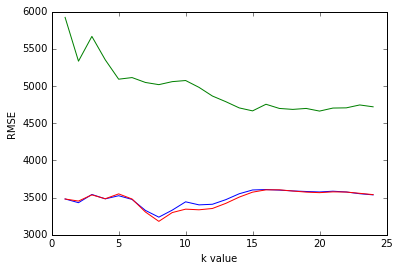

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')
    